In [1]:
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import sys
from scipy.interpolate import griddata
from tqdm import tqdm
# sys.path.append('/Users/jiarong/Google Drive/codes/jiarongw-postprocessing/functions')
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
from fio import readin
# plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/thesis.mplstyle')

In [2]:
def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
    ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
def plot_difference(ax,energy1,energy2):
    ax.plot(energy1.t, energy1.ke-energy2.ke, label='ke')
#     ax.plot(energy1.t, energy1.gpe-energy2.ke, label='gpe')
#     ax.plot(energy1.t, energy1.total/2-energy2.total/2, label='total/2')  

from scipy.signal import argrelextrema
def fit(ax,energy,localmax=1):
    global T
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
    ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a/T))
    return (a/T)  

def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy
def read_ns(name, skip = 100):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe', 'dissipation'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy


/tmp/ipykernel_265814/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_265814/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


15054.48
59964.2


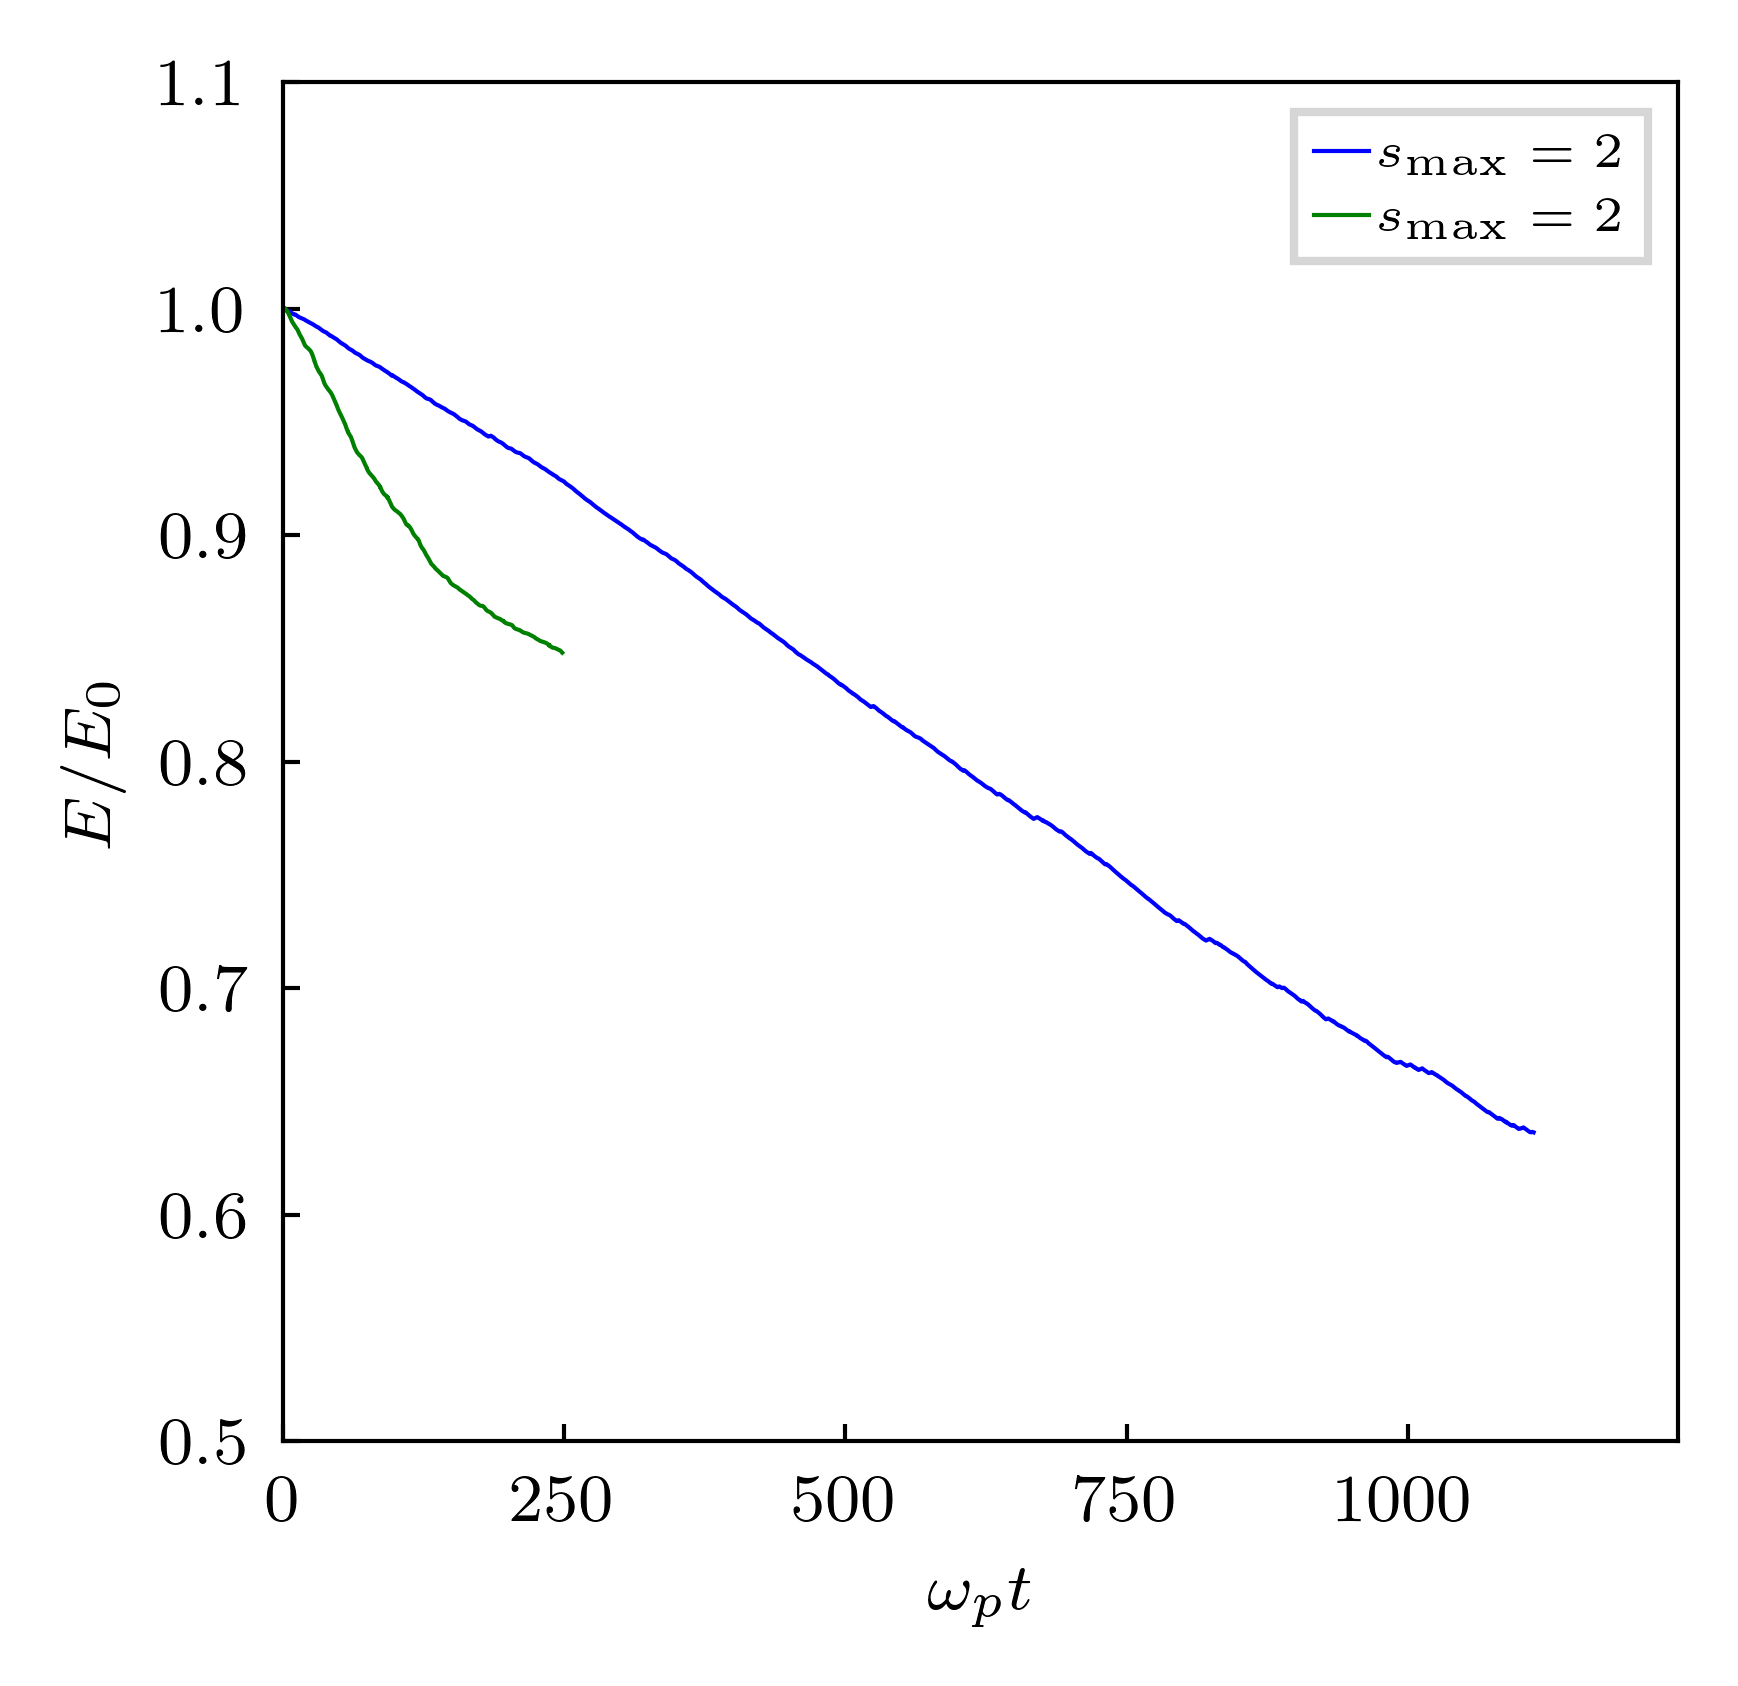

In [6]:
""" Test for smax """
fig = plt.figure(figsize=[3,3]); ax = fig.gca()
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.005_RE40000_10_15_rand2_Htheta0.503/'
energy = read('energy_before_remap.dat')
print(energy.total[0])
# ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--', lw=0.5)
# ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', lw=0.5)
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$s_{\mathrm{max}}=2$', lw=0.5)
arrowprops=dict(color='C0', headwidth=2, headlength=5, width=0.2)

path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/'
energy = read('energy_before_remap.dat')
print(energy.total[0])
# ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--', lw=0.5)
# ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', lw=0.5)
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$s_{\mathrm{max}}=2$', lw=0.5)
arrowprops=dict(color='C0', headwidth=2, headlength=5, width=0.2)

ax.set_ylim([0.5,1.1])
ax.set_xlim([0.,1000*omegap])
plt.legend(fancybox=False, fontsize=6, handlelength=1.1, labelspacing=0.4, handletextpad=0.2)
# ax.set_xticks([0,10,20,30,40,50])
plt.xlabel(r'$\omega_p t$')
plt.ylabel(r'$E/E_0$')
ax.tick_params(which='both', labelsize=8)

92034.4
70423.4
70423.4


/tmp/ipykernel_202961/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_202961/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_202961/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


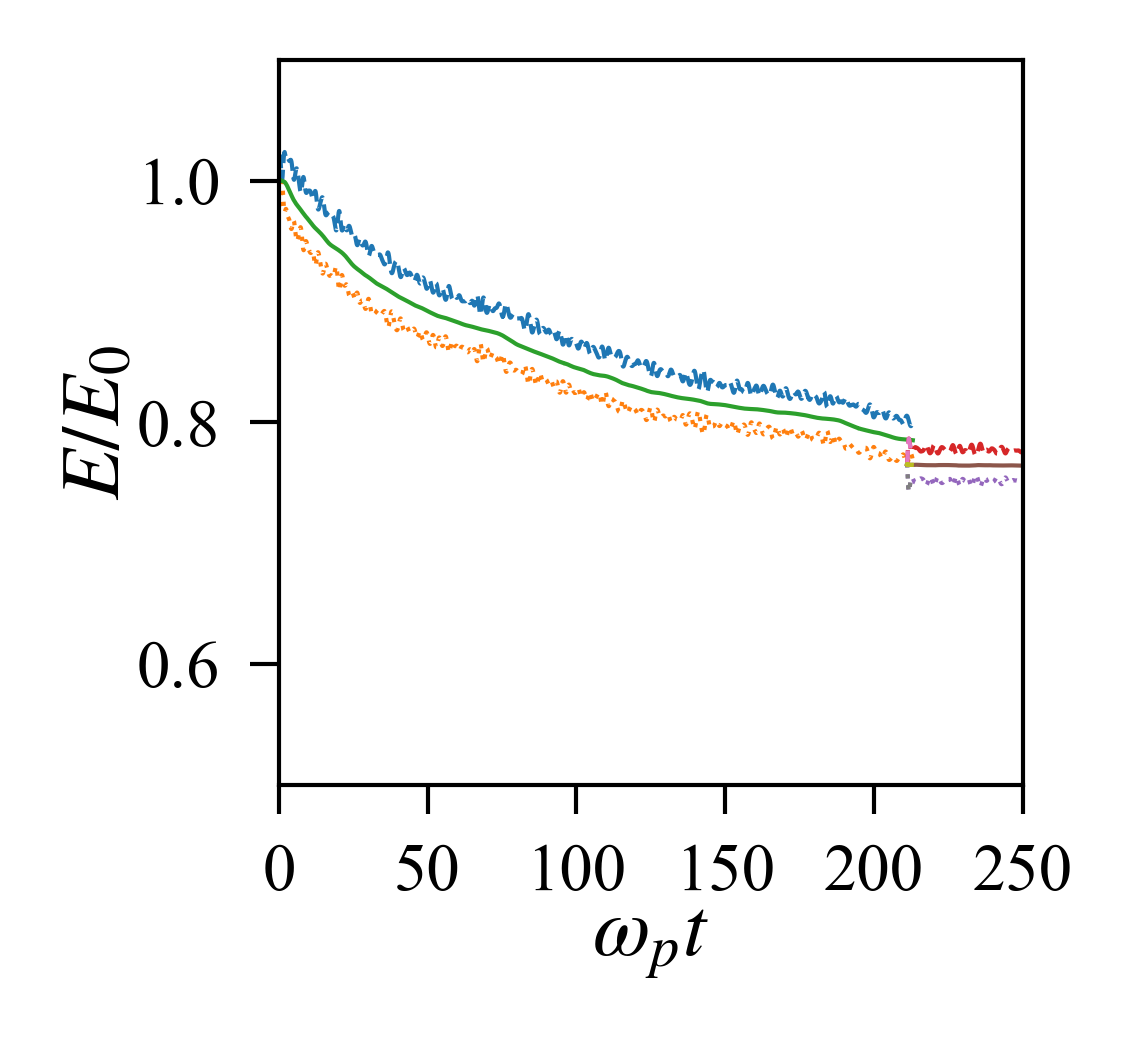

In [16]:
fig = plt.figure(figsize=[1.6,1.6]); ax = fig.gca()
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.03_RE40000_10_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--', label=r'Restart'+tag, lw=0.5)
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', label=r'Restart'+tag, lw=0.5)
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', lw=0.5)

# ax.plot(energy.t*omegap, energy.gpe/energy.gpe[0], '-', label=r'$E_p$'+tag, lw=0.5, c='purple')
# ax.plot(energy.t*omegap, energy.ke/energy.ke[0], '--', label=r'$E_k$'+tag, lw=0.5, c='blue')
# ax.plot(energy.t*omegap, energy.total/energy.total[0],':', label=r'$(E_p+E_k)/2$'+tag, lw=0.5, c='deeppink')


energy_end = np.array(energy.total)[0]
print(energy_end)

path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.03_RE40000_10_15_rand2_Htheta0.503/restart/'
energy = read('energy_before_remap.dat')
print(energy.total[0])
ax.plot(energy.t*omegap, 2*energy.ke/energy_end,'--', label=r'Restart'+tag, lw=0.5)
ax.plot(energy.t*omegap, 2*energy.gpe/energy_end,':', label=r'Restart'+tag, lw=0.5)
ax.plot(energy.t*omegap, energy.total/energy_end,'-', label=r'Restart'+tag, lw=0.5)

path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.03_RE40000_10_15_rand2_Htheta0.503/restart_new/'
energy = read('energy_before_remap.dat')
print(energy.total[0])
ax.plot(energy.t*omegap, 2*energy.ke/energy_end,'--', label=r'Restart'+tag, lw=0.5)
ax.plot(energy.t*omegap, 2*energy.gpe/energy_end,':', label=r'Restart'+tag, lw=0.5)
ax.plot(energy.t*omegap, energy.total/energy_end,'-', label=r'Restart'+tag, lw=0.5)

ax.set_ylim([0.5,1.1])
ax.set_xlim([0.,250])
# plt.legend(fancybox=False, fontsize=6, handlelength=1.1, labelspacing=0.4, handletextpad=0.2)
ax.set_xticks([0, 50, 100, 150, 200, 250])
plt.xlabel(r'$\omega_p t$', labelpad=0)
plt.ylabel(r'$E/E_0$', labelpad=0)
ax.tick_params(which='both', labelsize=8)

/tmp/ipykernel_300122/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_300122/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_300122/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_300122/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_300122/1023589478.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become a

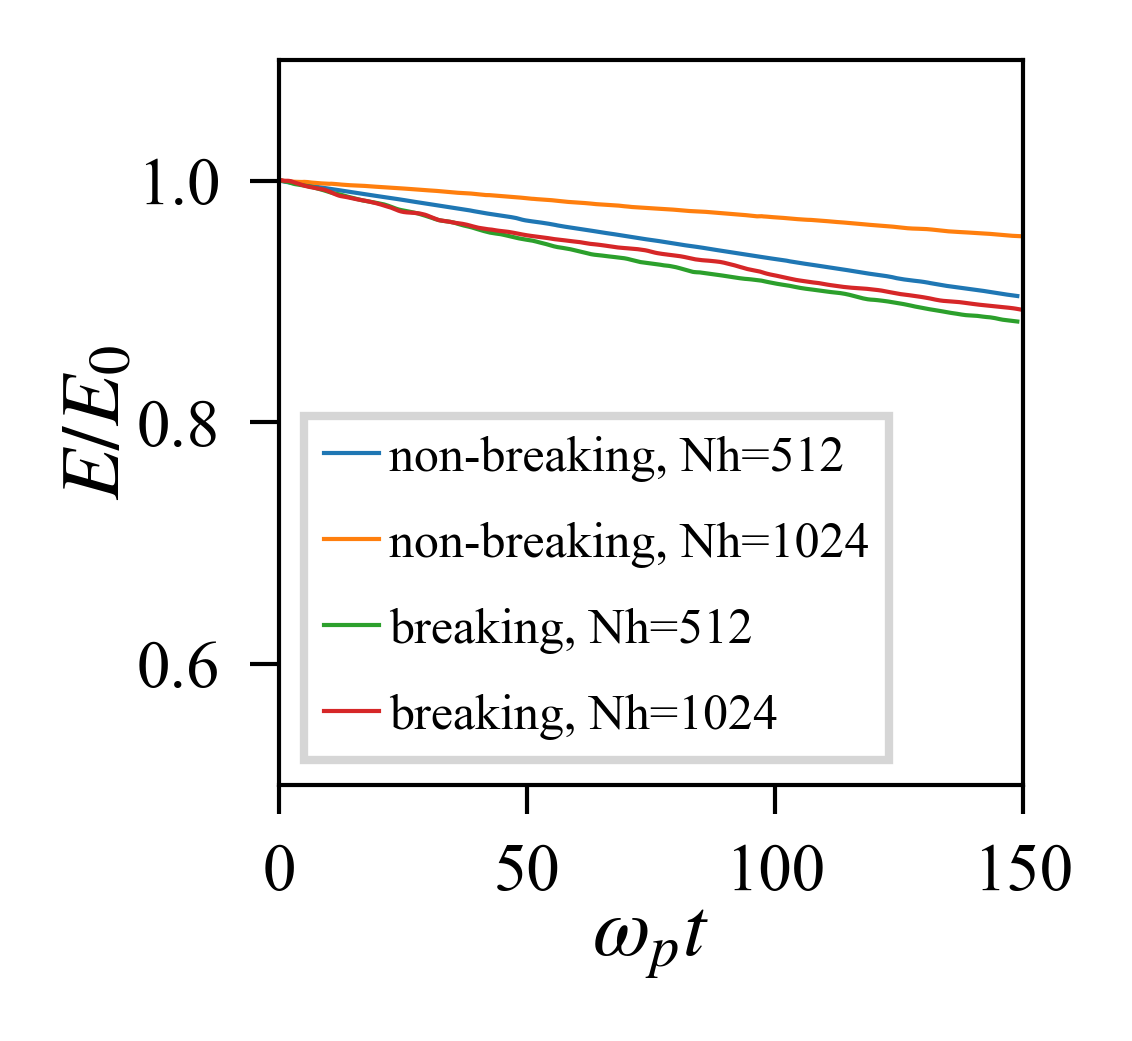

In [16]:
""" Check on the horizontal resolution independence. """
fig = plt.figure(figsize=[1.6,1.6]); ax = fig.gca()
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.005_RE40000_9_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
# ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--', label=r'Restart'+tag, lw=0.5)
# ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', label=r'Restart'+tag, lw=0.5)
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', lw=0.5, label='non-breaking, Nh=512')

path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.005_RE40000_10_15_rand2_Htheta0.503/'
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', lw=0.5, label='non-breaking, Nh=1024')
# path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.002_RE40000_10_15_rand2_Htheta0.503/'
# energy = read('energy_before_remap.dat')
# ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', lw=0.5, label='non-breaking, smaller, Nh=1024')

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_9_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', lw=0.5, label='breaking, Nh=512')

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', lw=0.5, label='breaking, Nh=1024')

ax.set_ylim([0.5,1.1])
ax.set_xlim([0.,150])
plt.legend(fancybox=False, fontsize=6, handlelength=1.1, labelspacing=0.8, handletextpad=0.2)
ax.set_xticks([0, 50, 100, 150])
plt.xlabel(r'$\omega_p t$', labelpad=0)
plt.ylabel(r'$E/E_0$', labelpad=0)
ax.tick_params(which='both', labelsize=8)
fig.savefig('figures_revision/horizontal_diffusion.pdf', bbox_inches='tight', pad_inche=0)

/tmp/ipykernel_166039/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_166039/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_166039/143577270.py:27: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


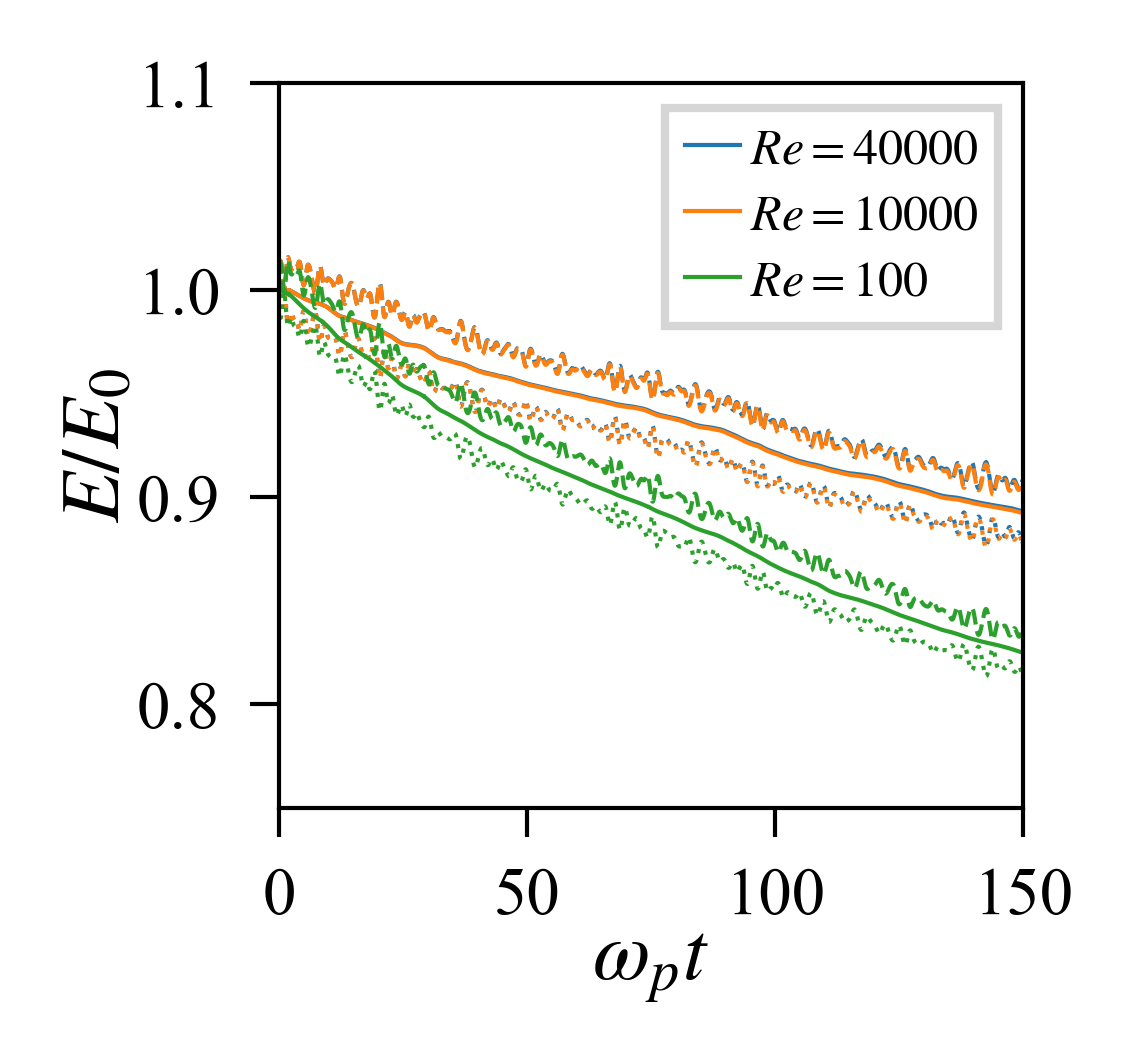

In [6]:
fig = plt.figure(figsize=[1.6,1.6]); ax = fig.gca()
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$Re=40000$'+tag, lw=0.5)
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0], '--', lw=0.5, c='C0')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', lw=0.5, c='C0')

path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE10000_10_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$Re=10000$'+tag, lw=0.5)
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0], '--', lw=0.5, c='C1')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', lw=0.5, c='C1')

# path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE100_10_15_rand2_Htheta0.503/'
# energy = read('energy_after_remap.dat')
# ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$Re=100$'+tag, lw=0.5)

path='/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE100_10_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', label=r'$Re=100$'+tag, lw=0.5)
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0], '--', lw=0.5, c='C2')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', lw=0.5, c='C2')

ax.set_ylim([0.75,1.1])
ax.set_xlim([0.,150])
plt.legend(fancybox=False, fontsize=6, handlelength=1.1, labelspacing=0.4, handletextpad=0.2)
ax.set_xticks([0, 50, 100, 150])
plt.xlabel(r'$\omega_p t$', labelpad=0)
plt.ylabel(r'$E/E_0$', labelpad=0)
ax.tick_params(which='both', labelsize=8)

/tmp/ipykernel_195702/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_195702/3101976964.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_jfm/energy_level10.eps', bbox_inches='tight', pad_inche=0)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_195702/3101976964.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_jfm/energy_level10.pdf', bbox_inches='tight', pad_inche=0)


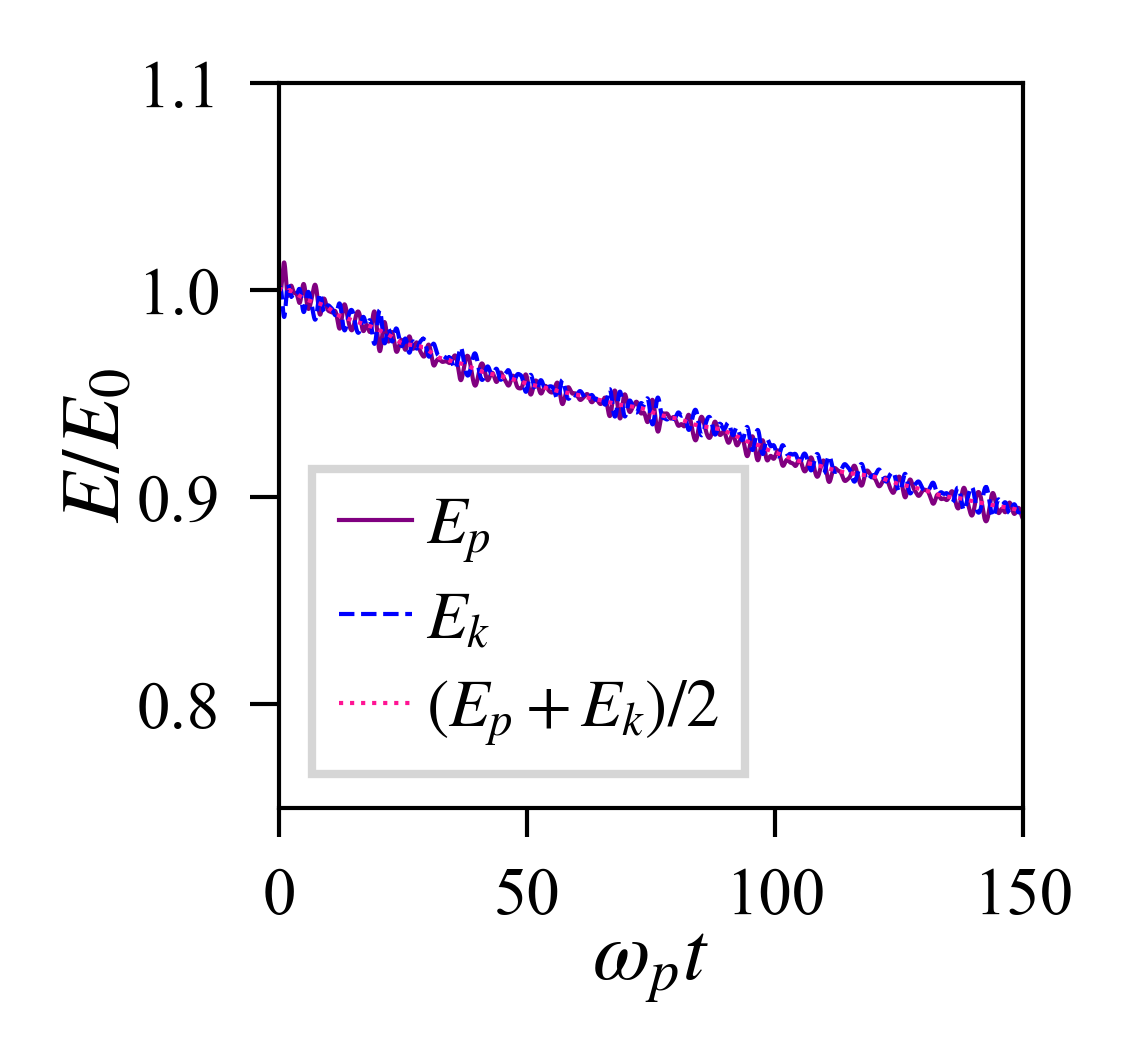

In [20]:
fig = plt.figure(figsize=[1.6,1.6]); ax = fig.gca()
path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5
ax.plot(energy.t*omegap, energy.gpe/energy.gpe[0], '-', label=r'$E_p$'+tag, lw=0.5, c='purple')
ax.plot(energy.t*omegap, energy.ke/energy.ke[0], '--', label=r'$E_k$'+tag, lw=0.5, c='blue')
ax.plot(energy.t*omegap, energy.total/energy.total[0],':', label=r'$(E_p+E_k)/2$'+tag, lw=0.5, c='deeppink')
ax.set_ylim([0.75,1.1])
ax.set_xlim([0.,150])
plt.legend(fancybox=False, fontsize=8, handlelength=1.1, labelspacing=0.4, handletextpad=0.2)
ax.set_xticks([0, 50, 100, 150])
plt.xlabel(r'$\omega_p t$', labelpad=0)
plt.ylabel(r'$E/E_0$', labelpad=0)
ax.tick_params(which='both', labelsize=8)
fig.savefig('figures_jfm/energy_level10.eps', bbox_inches='tight', pad_inche=0)
fig.savefig('figures_jfm/energy_level10.pdf', bbox_inches='tight', pad_inche=0)

/tmp/ipykernel_195702/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_195702/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_195702/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


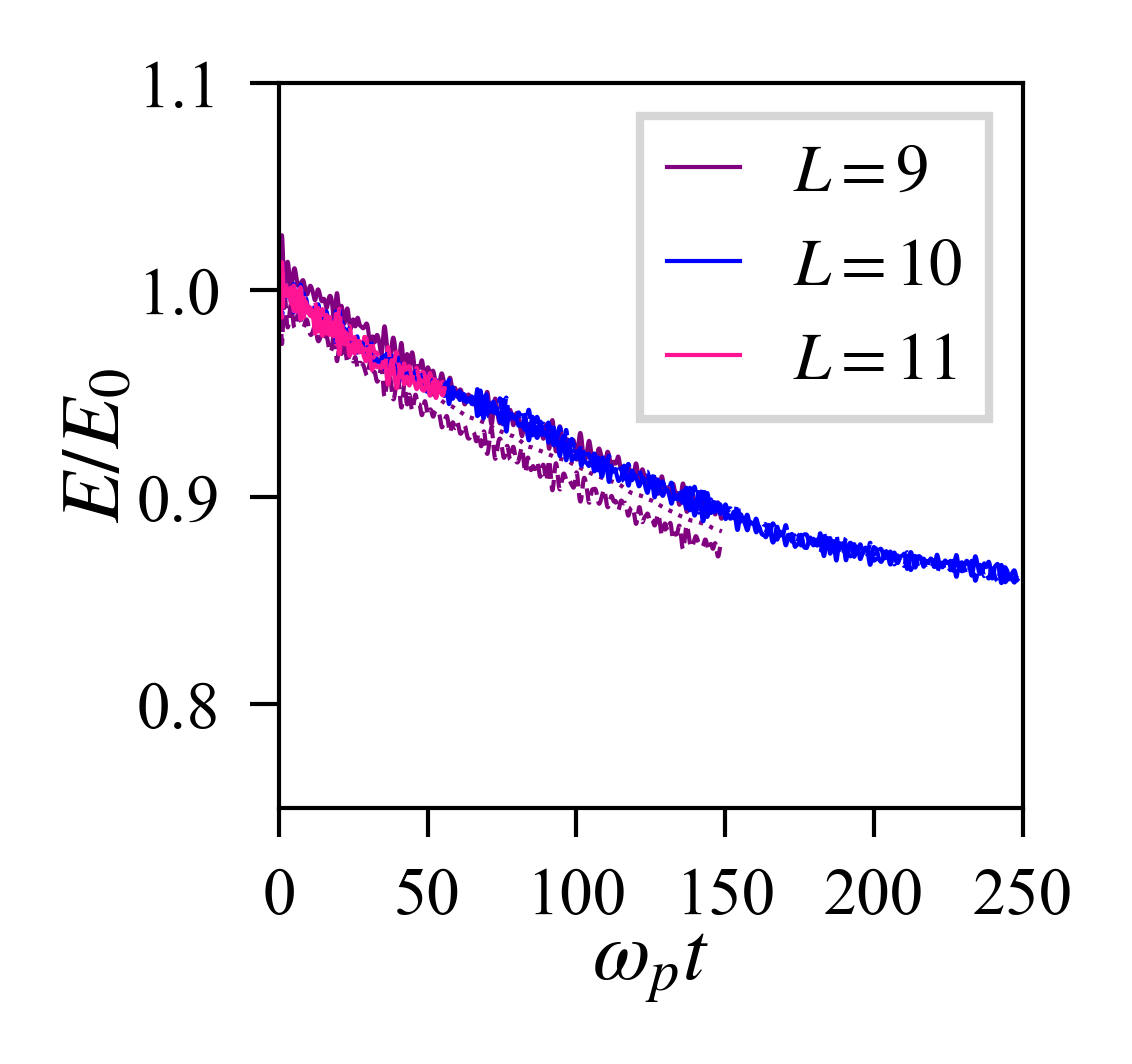

In [9]:
fig = plt.figure(figsize=[1.6,1.6]); ax = fig.gca()

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_9_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5
ax.plot(energy.t*omegap, energy.gpe/energy.gpe[0], '-', label=r'$L=9$', lw=0.5, c='purple')
ax.plot(energy.t*omegap, energy.ke/energy.ke[0], '--', lw=0.5, c='purple')
ax.plot(energy.t*omegap, energy.total/energy.total[0],':', lw=0.5, c='purple')

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5
ax.plot(energy.t*omegap, energy.gpe/energy.gpe[0], '-', label=r'$L=10$', lw=0.5, c='blue')
ax.plot(energy.t*omegap, energy.ke/energy.ke[0], '--', lw=0.5, c='blue')
ax.plot(energy.t*omegap, energy.total/energy.total[0],':', lw=0.5, c='blue')

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_11_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5
ax.plot(energy.t*omegap, energy.gpe/energy.gpe[0], '-', label=r'$L=11$', lw=0.5, c='deeppink')
ax.plot(energy.t*omegap, energy.ke/energy.ke[0], '--', lw=0.5, c='deeppink')
ax.plot(energy.t*omegap, energy.total/energy.total[0],':', lw=0.5, c='deeppink')

ax.set_ylim([0.75,1.1])
ax.set_xlim([0.,250])
plt.legend(fancybox=False, fontsize=8, handlelength=1.1)
ax.set_xticks([0, 50, 100, 150, 200, 250])
plt.xlabel(r'$\omega_p t$', labelpad=0)
plt.ylabel(r'$E/E_0$', labelpad=0)
ax.tick_params(which='both', labelsize=8)


/tmp/ipykernel_195702/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_195702/636017893.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


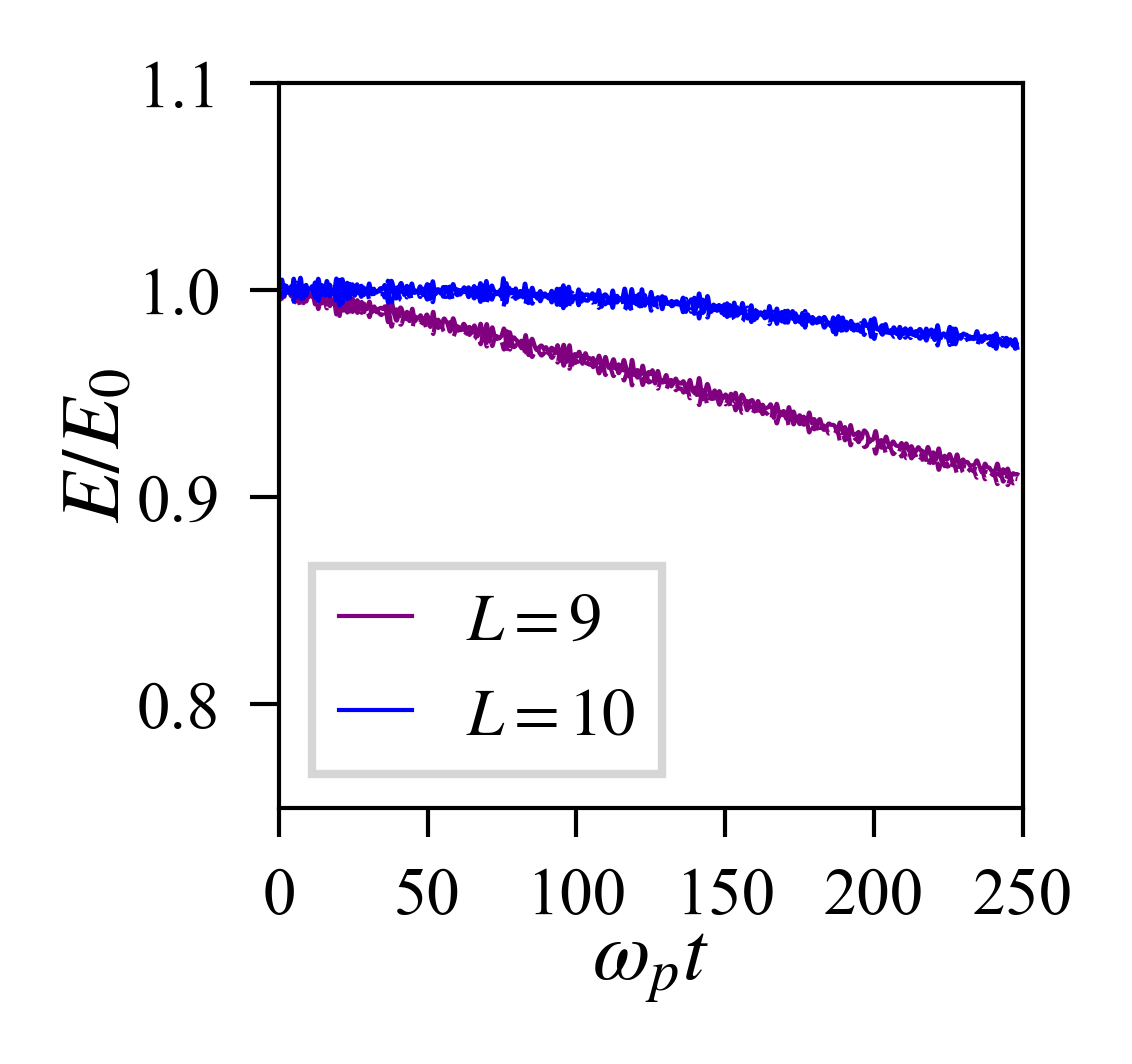

In [7]:
fig = plt.figure(figsize=[1.6,1.6]); ax = fig.gca()

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_9_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5
ax.plot(energy.t*omegap, energy.gpe/energy.gpe[0], '-', label=r'$L=9$', lw=0.5, c='purple')
ax.plot(energy.t*omegap, energy.ke/energy.ke[0], '--', lw=0.5, c='purple')
ax.plot(energy.t*omegap, energy.total/energy.total[0],':', lw=0.5, c='purple')

path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/'
energy = read('energy_after_remap.dat')
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5
ax.plot(energy.t*omegap, energy.gpe/energy.gpe[0], '-', label=r'$L=10$', lw=0.5, c='blue')
ax.plot(energy.t*omegap, energy.ke/energy.ke[0], '--', lw=0.5, c='blue')
ax.plot(energy.t*omegap, energy.total/energy.total[0],':', lw=0.5, c='blue')

# path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_11_15_rand2_Htheta0.503/'
# energy = read('energy_after_remap.dat')
# tag = ''
# kp = 2*np.pi/(200/5)
# omegap = (9.8*kp)**0.5
# ax.plot(energy.t*omegap, energy.gpe/energy.gpe[0], '-', label=r'$L=11$', lw=0.5, c='deeppink')
# ax.plot(energy.t*omegap, energy.ke/energy.ke[0], '--', lw=0.5, c='deeppink')
# ax.plot(energy.t*omegap, energy.total/energy.total[0],':', lw=0.5, c='deeppink')

ax.set_ylim([0.75,1.1])
ax.set_xlim([0.,250])
plt.legend(fancybox=False, fontsize=8, handlelength=1.1)
ax.set_xticks([0, 50, 100, 150,200,250])
plt.xlabel(r'$\omega_p t$', labelpad=0)
plt.ylabel(r'$E/E_0$', labelpad=0)
ax.tick_params(which='both', labelsize=8)


a_theory = -6.31655e-05
a_fit = -0.00208037


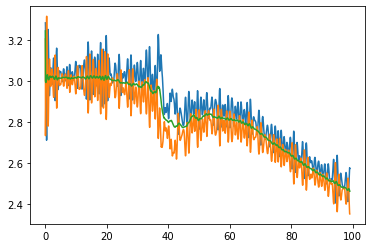

In [359]:
path = '/home/jiarong/research/projects/multilayer/testing/git_multilayer/ffield_focusing_1D/'
fig = plt.figure(); ax = fig.gca()
energy1 = read('budget.dat')
plot(ax,energy1,'exponential 30 layers')
nu = 4*10**(-5); k = 2*np.pi/10; g = 9.8; T = 2*np.pi/(g*k)**0.5
a_theory = -4*nu*k**2
# a_fit = fit(ax,energy1,0)
# Since time was scaled
print("a_theory = %g" %a_theory)
print("a_fit = %g" %a_fit)

In [ ]:
path = '/home/jiarong/research/projects/multilayer/stokes_ml_RE40000_nl30_N256_coeff0.05_ak0.35/'
# path = '/home/jiarong/research/projects/multilayer/field_init_test_P0010_RE40000/'
fig = plt.figure(); ax = fig.gca()
energy1 = read('budget.dat')
plot(ax,energy1,'exponential 30 layers')
nu = 4*10**(-5); k = 2*np.pi/1; g = 9.8; T = 2*np.pi/(g*k)**0.5
a_theory = -4*nu*k**2
# a_fit = fit(ax,energy1,0)
# Since time was scaled
print("a_theory = %g" %a_theory)
print("a_fit = %g" %a_fit)
print("T = %g" %T)

path = '/home/jiarong/research/projects/multilayer/stokes_ml_RE40000_nl60_N256_coeff0_ak0.35/'
energy2 = read('budget.dat')
plot(ax,energy2,'uniform 60 layers', '--')
# path = '/home/jiarong/research/projects/multilayer/stokes_ns/'
# energy2 = read_ns('budgetWater.dat')
# energy2 = energy2.mul([1,9.8,9.8,1,9.8])
# plot(ax,energy2,'NS','--')
'''
    Get potential energy by looking at eta squared.
'''
# file_common = path + 'surface/eta_matrix_'
# F_center_list = []; F_k_list = []; aver = [];
# gpe = []
# N = 256
# t = np.arange(0,50,0.1)
# for i in range(0,500):    
#     pfile = file_common + '%g' % (i/10.)
#     eta = np.fromfile(pfile, dtype=np.float32)
#     eta = eta.reshape(N+1,N+1)
#     eta = eta[1:,1:]
#     gpe.append(np.sum((eta-np.average(eta))**2))
# gpe_int = np.array(gpe)*(50/N)**2*9.8*1/2
# plt.plot(t, gpe_int, label = 'gpe from eta')
# plt.title("N = 256, 60 layers exponential"); 
plt.legend(loc = 'lower left')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel("t/T"); plt.ylabel("E")
# plt.xlim([0,4])
# plt.ylim([0.002,0.009])

/tmp/ipykernel_17592/3785344008.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_17592/3785344008.py:26: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


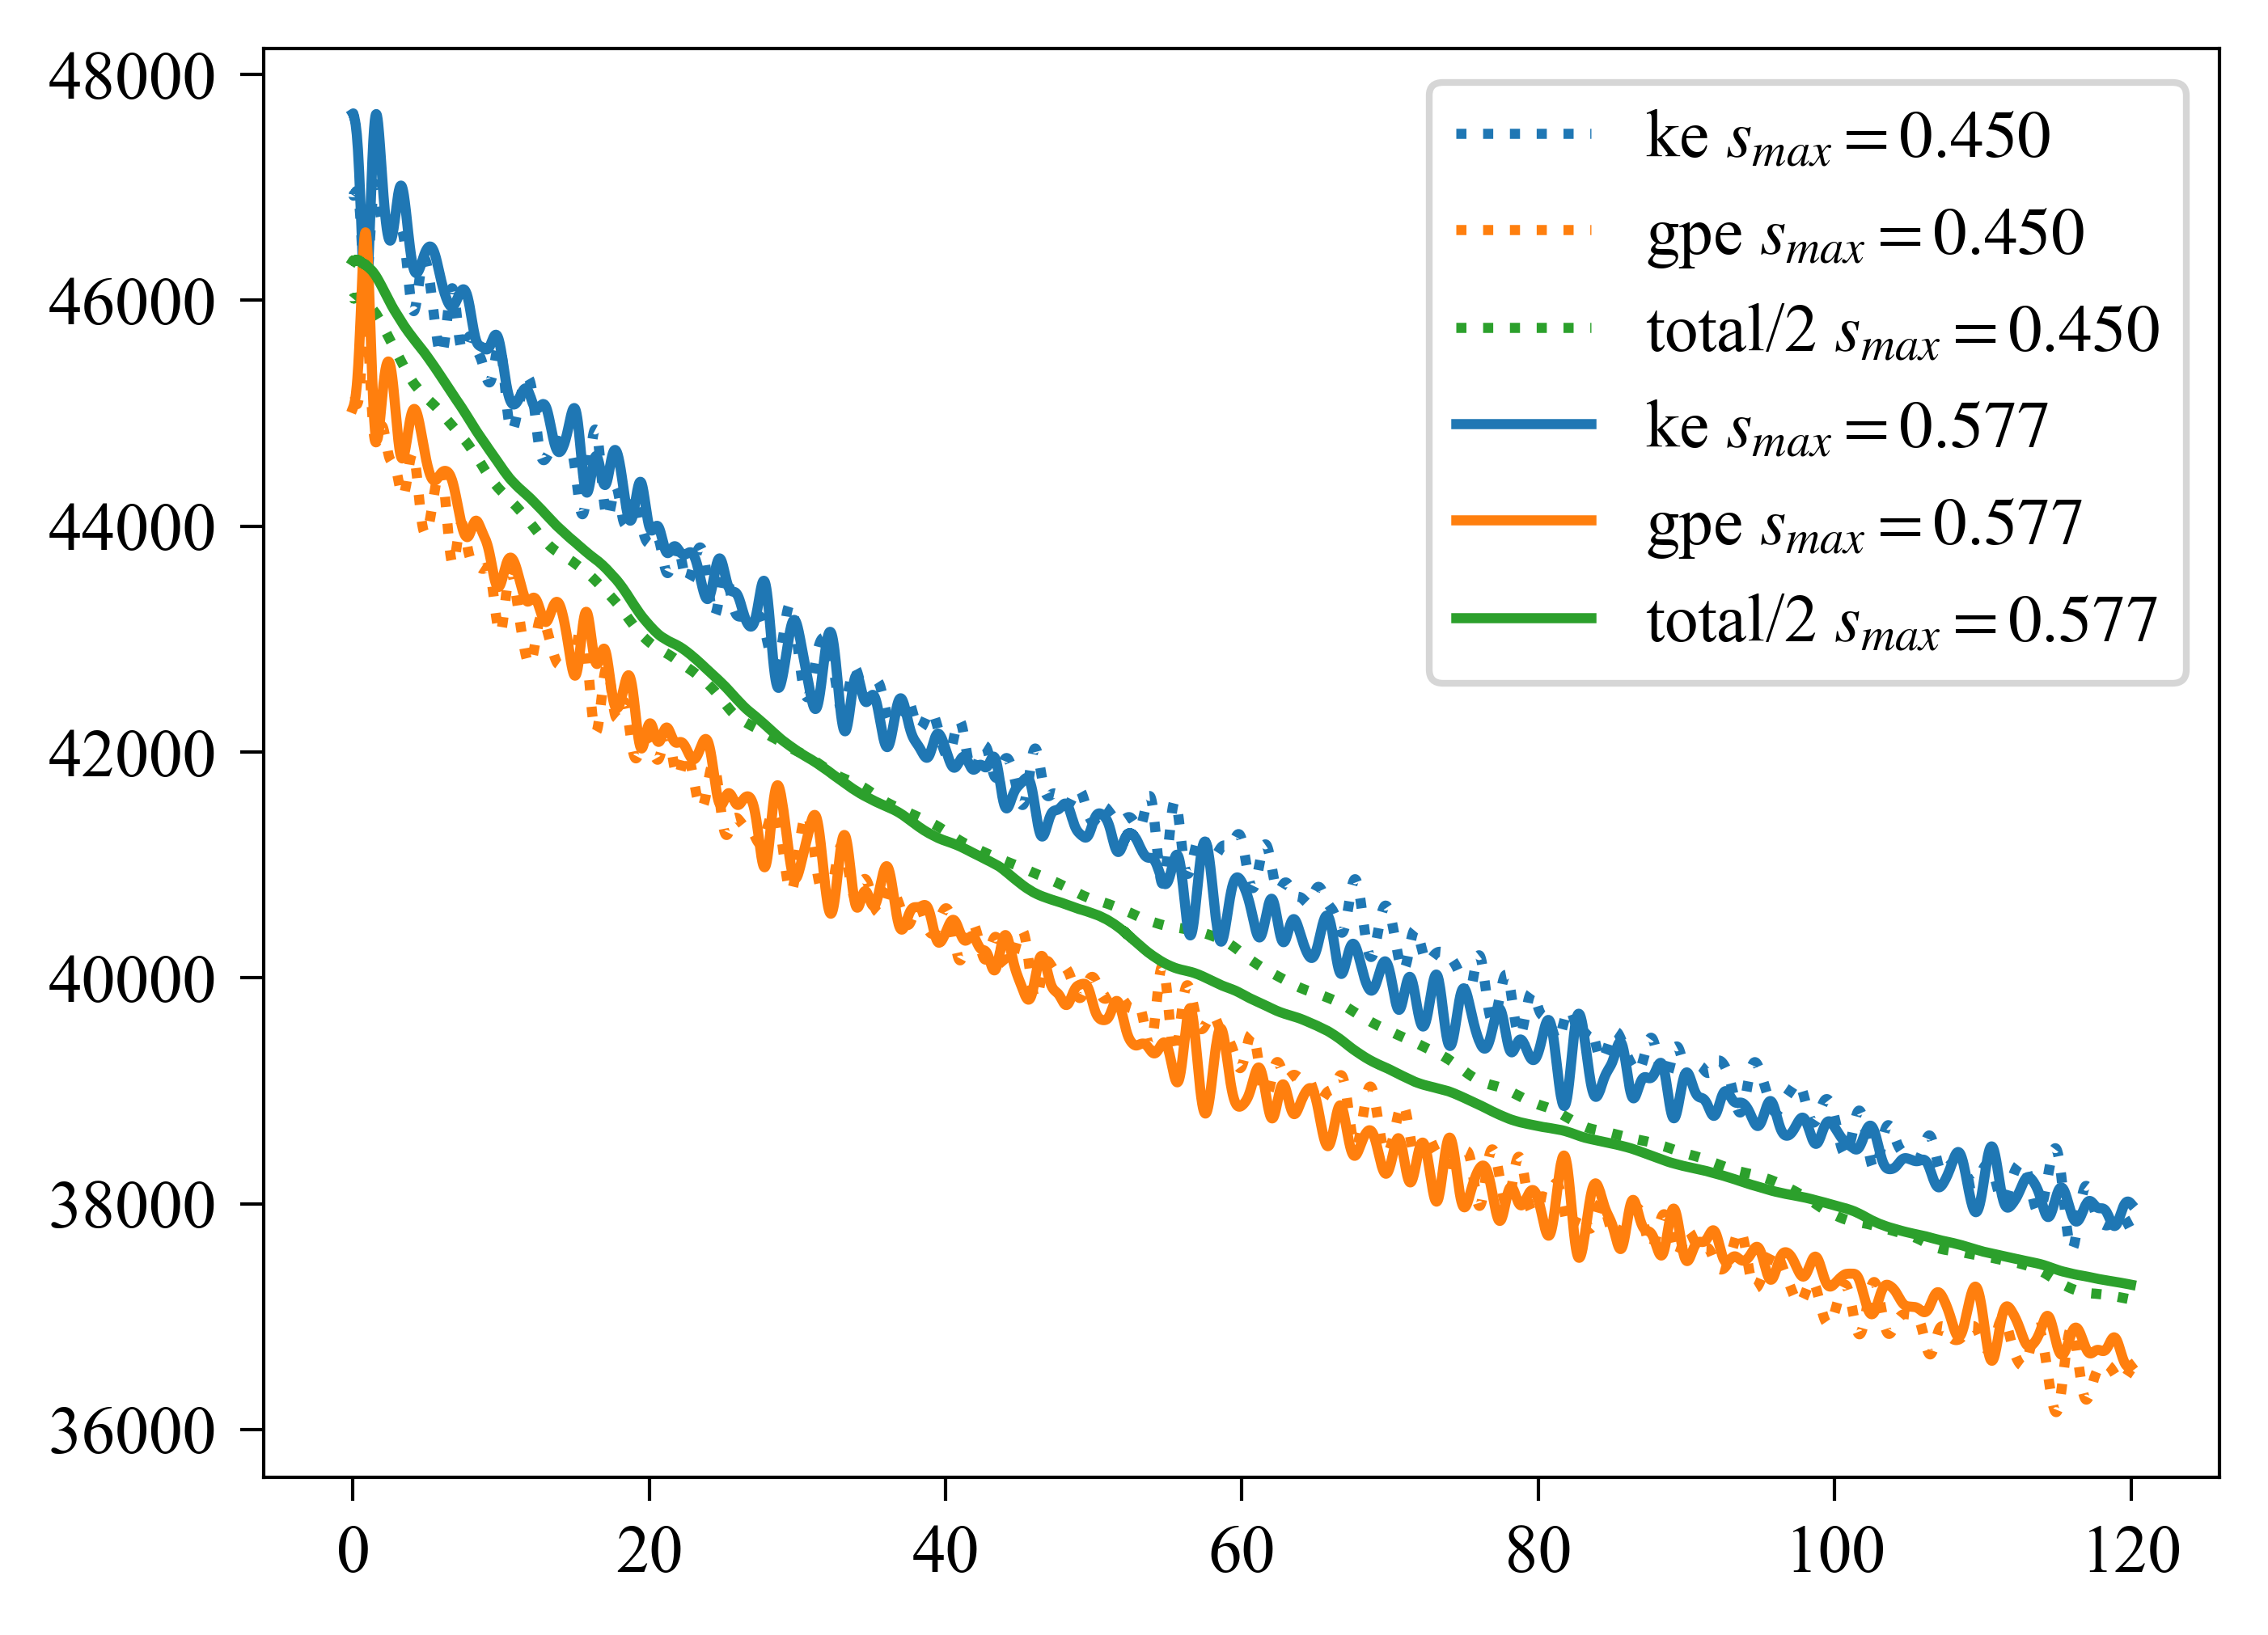

In [4]:
fig = plt.figure(); ax = fig.gca()
path = '/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.03_RE40000_9_15_rand2_Htheta0.503_s0.45/'
energy1 = read('energy_after_remap.dat')
plot(ax,energy1,'$s_{max}=0.450$', line=':')
path = '/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.03_RE40000_9_15_rand2_Htheta0.503/'
energy1 = read('energy_after_remap.dat')
plot(ax,energy1,'$s_{max}=0.577$')
plt.legend()


In [364]:
epsilon_l = 0.04 # After divided by rho
kp = 2*np.pi/10; g = 9.8; cp = (g/kp)**0.5
b = epsilon_l*g/cp**5
print("b = %g" %b)
S = 0.5 # or 0.1 if std eta
b_ = 0.4*(S-0.08)**(5/2)
print("b_ = %g" %b_)

b = 0.00040801
b_ = 0.0457281


In [365]:
cp

3.949327084834294

In [334]:
l = 1; RE = 40000
delta = l/RE**0.5
delta

0.005

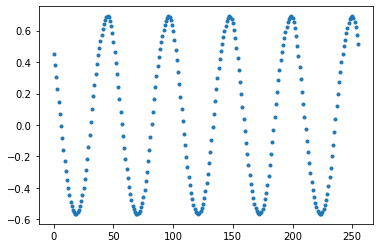

In [240]:
# Grid display
path = '/home/jiarong/research/projects/multilayer/testing/test_linear/ak02_RE40000_h10_nl120_coeff005_N256/'
name = 'grid_end.dat'
grid,exists = readin(path+name, table_delimiter = ' ', table_headers = ['x', 'h', 'ux'])
x = np.array(grid.x)
h = np.array(grid.h)
ux = np.array(grid.ux)
N = 256; nl = 120
x = np.reshape(x, [N,nl])
h = np.reshape(h, [N,nl])
ux = np.reshape(ux, [N,nl])
# for i in range(0,256):
#     plot(x[i],h,'.')
plt.plot(ux[:,59], '.')

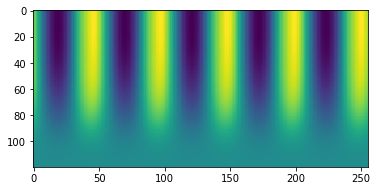

In [241]:
image = np.rot90(ux)
plt.imshow(image)

In [3]:
Lambda = 1; g = 9.8
k = 2*np.pi/Lambda
c = (g/k)**0.5
nu = 1/100000.
Re = Lambda*c/nu
scale = Lambda/Re**0.5
print(scale)
n = Lambda/scale
print(n)

0.0028296873164962767
353.3959367772838


In [337]:
# A function to visualize the grid distribution
def visual_grid (nlayer, coeff):
    z = np.zeros(nlayer)
    z[0] = -1
    h = np.ones(z.size-1)
    for i in range(0, h.size):
        h[i] = h[i]*np.exp(coeff*i)
        h = h/np.sum(h)*1
    for i in range(0, z.size-1):
        z[i+1] = z[i]+h[i]
    return z

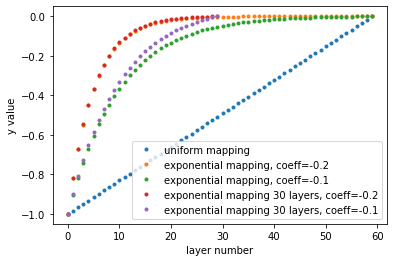

In [338]:
z = visual_grid(60, 0)
plt.plot(z, '.', label='uniform mapping')
z = visual_grid(60, -0.2)
plt.plot(z, '.', label='exponential mapping, coeff=-0.2')
z = visual_grid(60, -0.1)
plt.plot(z, '.', label='exponential mapping, coeff=-0.1')
# z = visual_grid(60, -0.05)
# plt.plot(z, '.', label='exponential mapping, coeff=-0.05')
z = visual_grid(30, -0.2)
plt.plot(z, '.', label='exponential mapping 30 layers, coeff=-0.2')
z = visual_grid(30, -0.1)
plt.plot(z, '.', label='exponential mapping 30 layers, coeff=-0.1')
plt.xlabel('layer number'); plt.ylabel('y value')
plt.legend()

In [345]:
z = visual_grid(60, -0.05)
z[58]-z[57]

0.0029769114904773268

(160, 300)

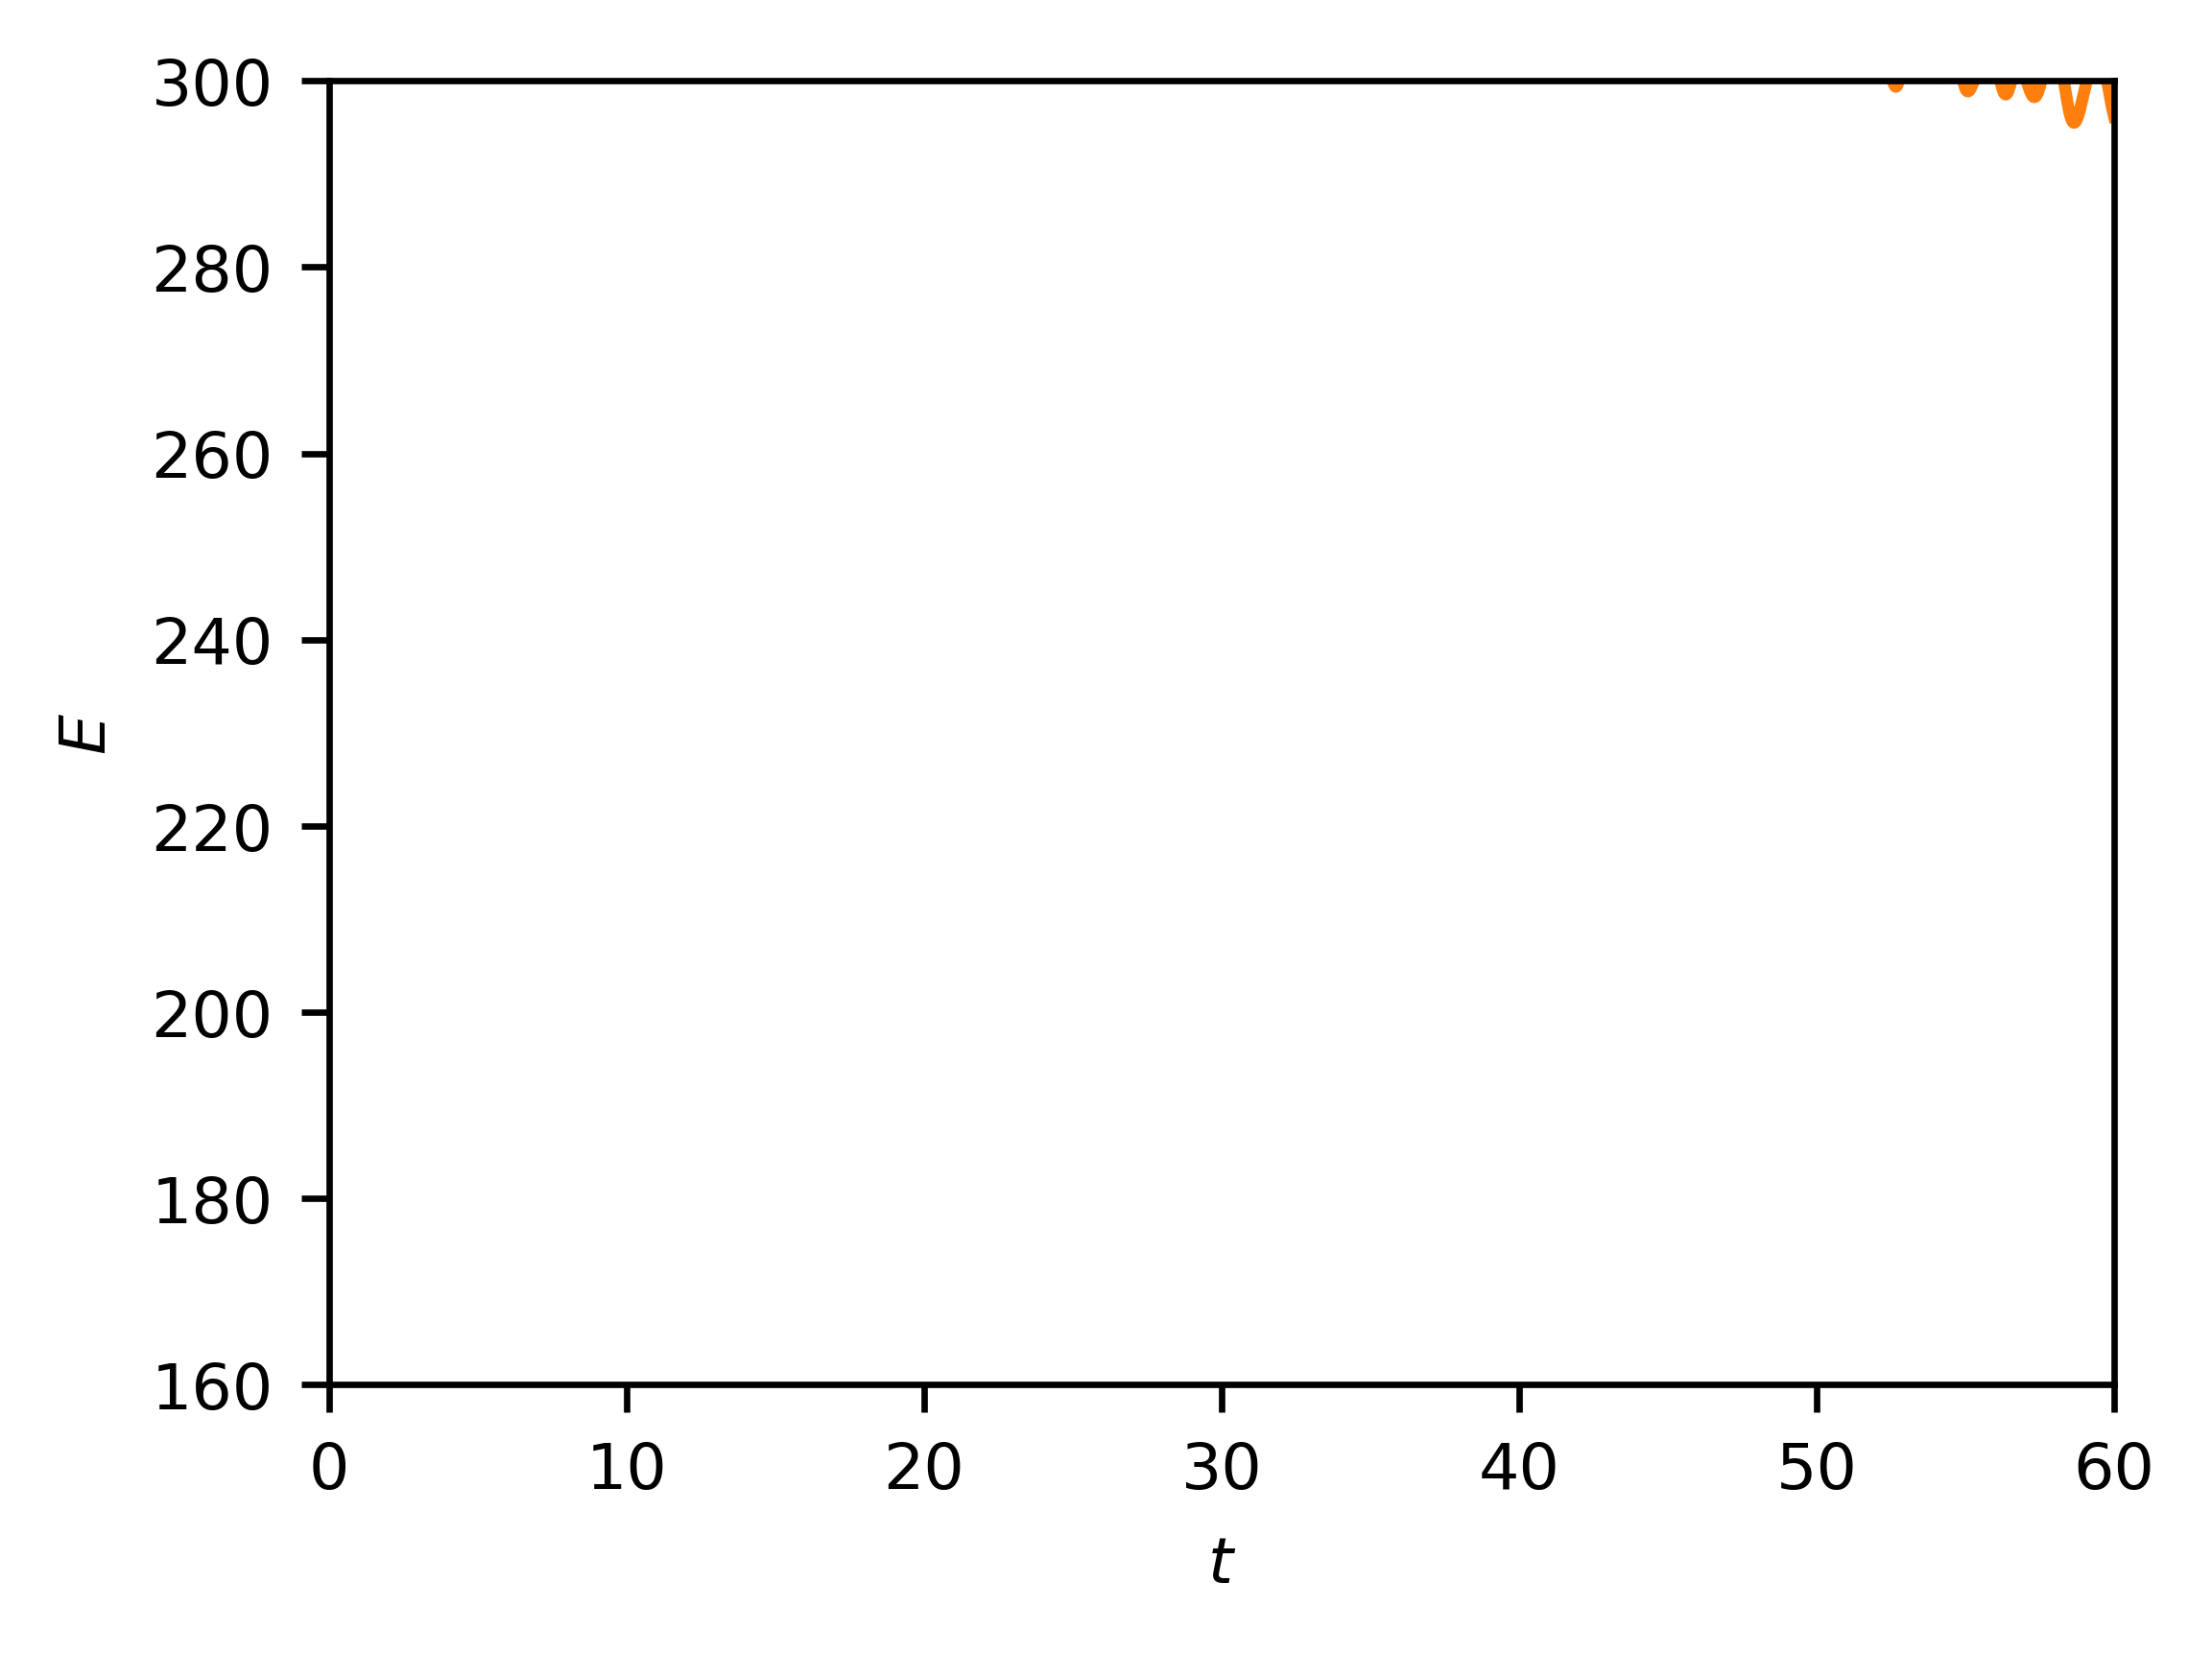

In [20]:
from matplotlib.legend_handler import HandlerTuple
def read(name):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'])
    if exists:
        total = energy.ke + energy.gpe 
        energy.gpe = energy.gpe
    energy.insert(len(energy.columns), "total", total, True)
    return energy
def fit(ax,energy,localmax=1):
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
#     ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a))
    return (a)
# path = '/home/jiarong/research/projects/multilayer/field_init_test_P0010_RE40000/'
# path = '/projects/DEIKE/jiarongw/multilayer/old/field_init_test_P0010_RE40000_9_60_rand3/'

def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
    ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    l, = ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
    return l

fig = plt.figure(figsize=[4,3]); ax = fig.gca()
    
# path = '/projects/DEIKE/jiarongw/multilayer/field_new_P0020_RE40000_9_30_rand0_Htheta051/'
path = '/projects/DEIKE/jiarongw/multilayer/field_new_P0040_RE40000_9_30_rand0_Htheta051/'
# path = '/projects/DEIKE/jiarongw/multilayer/field_init_test_P0010_RE40000_9_60_rand0/'
energy1 = read('energy_after_remap.dat')
l1 = plot(ax,energy1)
# path = '/projects/DEIKE/jiarongw/multilayer/field_new_P0020_RE40000_9_30_rand0_noHtheta/'
# energy1 = read('energy_after_remap.dat')
# l2 = plot(ax,energy1,line='--')

nu = 2.5*10**(-4); k = 2*np.pi/10; g = 9.8; T = 2*np.pi/(g*k)**0.5
a_theory = -4*nu*k**2
l3, = plt.plot(energy1.t, energy1.total[0]/2*np.exp(a_theory*energy1.t), '--', c='gray', lw=1)
# legend1 = plt.legend([l1,l2,l3], ['With high frequency damping', 'Without high frequency damping', r'Pure viscous dissipation of $k_p$'],
#                      handler_map={tuple: HandlerTuple(ndivide=None)}, loc='lower left', bbox_to_anchor=(0.01, 0.05), fontsize=6,
#                      frameon=True, fancybox=False, handlelength=2)


# plt.title("30 layers, coeff = -0.2"); plt.legend()
# plt.yscale('log')
plt.xlabel(r'$t$');plt.ylabel(r'$E$')
plt.xlim([0,60])
plt.ylim([160,300])

In [40]:
S_diss = (636.632-622.778)/10
print(S_diss)

1.3853999999999929


In [18]:
""" Energy dissipation rate """
S_diss = (410.044-399.392)/10
print(S_diss)

# Check if energy from mean square agree with energy from KE+GPE (they match!)
filepath = '/projects/DEIKE/jiarongw/multilayer/field_new_P0020_RE40000_9_30_rand0_Htheta051/surface/'
filename = filepath + 'eta_matrix_%g' %50
kp = 2*np.pi/10; N = 512; L = 50
eta = np.fromfile(filename, dtype=np.float32)
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
E = np.var(eta)*9.8
print(E*50**2)

1.0651999999999986
399.12192337214947


In [24]:
kp = 1.5
RE = 1/(-a/4/kp**2); print(RE)
1/4000

357.5409247120385


0.00025

In [255]:
1/32


0.03125

In [57]:
-7.3499*10**6/9.8
print(9.8*50**2*25**2/2/25)

306250.0


In [39]:
(0.0043/4/10**(-6))**0.5

32.78719262151

In [42]:
2*np.pi/(50/256)

32.169908772759484

In [ ]:
from matplotlib import rc
# text and font
## small, medium, large, x-large, xx-large, larger, or smaller
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'medium'
plt.rcParams['legend.fontsize'] = 'small'
# Figure size
plt.rcParams['figure.figsize'] = 8, 4.8 ## figure size in inches
plt.rcParams['figure.dpi'] = 1200        ## figure dots per inchfigsize : 6.4, 4.8
# Line
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 10
# Ticks
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['xtick.major.size'] = 3.5

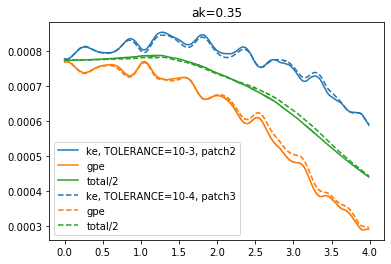

In [199]:
# path = '/home/jiarong/research/projects/multilayer/'
# energy,exists = readin(path+'budgetWater_Wouter_035.dat', table_delimiter = ' ', table_headers =['t','ke','gpe','dissipation'])
# if exists:
#     total = energy.ke + energy.gpe 
#     diss = np.zeros(energy.shape[0])
#     for i, row in energy.iterrows():
#         if i == 0:
#             diss[i] = 0
#             last_t = row['t'] # record t in last row
#         else:
#             diss[i] = diss[i-1] + row['dissipation'] * (row['t'] - last_t)
#             last_t = row['t']
# energy.insert(len(energy.columns), "total", total, True)
# energy.insert(len(energy.columns), "total_diss", total+diss, True)
# plt.plot(energy.t, energy.ke, label='ke')
# plt.plot(energy.t, energy.gpe, label='gpe')
# plt.plot(energy.t, energy.total/2, label='total/2')
# # plt.plot(energy.t, diss, label='dissipation')
# plt.plot(energy.t, energy.total_diss/2, label='total/2+diss/2')
# ax = plt.gca()
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))
# plt.xlim([0,4])
# ax.yaxis.major.formatter._useMathText = True
# plt.ticklabel_format(axis="y", style="sci", scilimits=(-3,-3))
path = '/home/jiarong/research/projects/multilayer/testing/singlewave/release2_ak035/'
energy,exists = readin(path+'budget.dat', table_delimiter = ' ', table_headers =['t','ke','gpe'])
if exists:
    total = energy.ke + energy.gpe + 0.125
energy.insert(len(energy.columns), "total", total, True)
plt.plot(energy.t, energy.ke, color='C0', label='ke, TOLERANCE=10-3, patch2')
#plt.plot(energy_30layer.t, energy_30layer.ke, '--', label='ke, 30 layers', color=plt.gca().lines[-1].get_color())
plt.plot(energy.t, energy.gpe+0.125, color='C1', label='gpe')
plt.plot(energy.t, energy.total/2, color='C2', label='total/2')
path = '/home/jiarong/research/projects/multilayer/testing/singlewave/release3_ak035/'
energy,exists = readin(path+'budget.dat', table_delimiter = ' ', table_headers =['t','ke','gpe'])
if exists:
    total = energy.ke + energy.gpe + 0.125
energy.insert(len(energy.columns), "total", total, True)
plt.plot(energy.t, energy.ke, '--', color='C0', label='ke, TOLERANCE=10-4, patch3')
#plt.plot(energy_30layer.t, energy_30layer.ke, '--', label='ke, 30 layers', color=plt.gca().lines[-1].get_color())
plt.plot(energy.t, energy.gpe+0.125, '--', color='C1', label='gpe')
plt.plot(energy.t, energy.total/2, '--', color='C2', label='total/2')
plt.title("ak=0.35")
plt.legend()

In [ ]:
path = '/home/jiarong/research/projects/multilayer/testing/focusing1D_trial24/P0018_newpatch/'
x = np.arange(-25,25,50/256)
t = np.arange(32.8,35.6,0.4)
for i in range(t.size):
    eta = np.fromfile(path+'surface/eta_matrix_%g' %t[i], dtype=np.float32)
    N = 256
    eta = eta.reshape(N+1,N+1); eta= eta[1:,1:]
    plt.plot(x, eta[:,127], label='t=%g' %t[i], color=plt.cm.get_cmap('summer')(i/t.size))
plt.legend(loc='upper right')
plt.xlabel('x'); plt.ylabel('eta')